# Debunking Myths: What affects COVID deaths and what doesnt?



Joseph Wobus, Justin Sher, Megan Kee


# Introduction

Coronavirus disease 2019 (COVID-19) is a respiratory disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It first appeared at the end of December in 2019 in Wuhan, China. This virus has its origins in bats and the epicenter of the outbreak early on was reported to have been linked to a large seafood and live animal market. The virus was originally suggested to have been spread through animal to person contact, and as later cases emerged, the virus was suggested to have been spread through person to person contact. What originally started in Wuhan, China has become a global pandemic, with an extremely high transmission rate and nations declaring states of emergencies. Up to date globally, there has been a total of 4.69 million confirmed cases, with 1.72 million recovered and 313,000 deaths. The United States has the highest number of both confirmed cases and deaths compared to the rest of the world. Compared to the second and third leading nations (Russia and the United Kingdom respectively), the United States has a whopping 1.51 million confirmed cases, whereas Russia has 282,000 confirmed cases, and the United Kingdom has only 243,000 confirmed cases. In this project, we look to determine which demographics are correlating factors that are causing such high rates in the United States.

With the rise of the COVID-19 Pandemic comes the inevitable rise of the spread of misinformation. In this project, we decided to debunk several myths surrounding the COVID-19 crisis and test which demographics are more susceptible to infections/deaths. Using Python, regression analysis, and null-hypothesis testing, we set out to prove and disprove several assumptions made about whether certain factors influence COVID-19 death rates. We will look at the following variables: Smoking rate, income, population density, and pollution to see if they have an influence on COVID-19 Deaths.


# Import Libraries/Data

In [0]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
df = pd.read_csv("COVID19_state.csv")
df = df.set_index("State")
df

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,Sex Ratio,Smoking Rate,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
State,,,,,,,,,,,,,,,,,,,,,,,,,
Alaska,28680,381,10,734002,1.2863,0.4081,119,59687,73205,5.8,1.054688,21.0,12.1,35.3,1900,21,11064,6.4,1.0,26.60,66.0,0.36,0.39,0.25,03/19/20
Alabama,129444,10164,403,4908621,96.9221,0.4847,1533,42334,45219,2.7,0.930145,20.9,21.4,58.0,12205,101,7281,8.1,1.0,62.80,59.0,0.33,0.37,0.31,03/16/20
Arkansas,70323,4043,94,3038999,58.4030,0.4719,732,42566,42454,3.5,0.956630,22.3,18.0,61.7,7150,88,7408,7.1,0.0,60.40,56.2,0.34,0.37,0.30,03/17/20
Arizona,150241,11380,542,7378494,64.9550,0.4713,1559,43650,48055,4.5,0.966965,15.6,12.4,41.2,17806,83,6452,9.7,1.0,60.30,89.8,0.33,0.36,0.30,03/16/20
California,991897,67939,2770,39937489,256.3727,0.4899,7338,62586,74205,3.9,0.975113,11.3,15.6,30.9,112906,359,7549,12.8,9.0,59.40,95.0,0.33,0.40,0.26,03/19/20
Colorado,106761,19879,987,5845526,56.4011,0.4586,1597,56846,63882,2.5,0.994850,14.6,9.7,44.0,14509,89,6804,6.7,1.0,45.10,86.2,0.33,0.40,0.27,03/23/20
Connecticut,132508,33765,3008,3563077,735.8689,0.4945,674,74561,76342,3.8,0.947106,12.7,14.8,28.9,15605,32,9859,7.2,1.0,49.00,88.0,0.30,0.38,0.32,03/17/20
District of Columbia,30261,6389,328,720687,11814.5410,0.5420,314,47285,200277,5.2,0.888570,14.3,11.2,19.6,7346,10,11944,9.8,0.0,54.65,100.0,0.30,0.48,0.22,03/16/20
Delaware,31928,6565,225,982895,504.3073,0.4522,186,51449,77253,3.9,0.926194,17.0,13.1,40.4,3148,7,10254,8.3,0.0,55.30,83.3,0.30,0.37,0.33,03/16/20


# Analysis

# Test 1: Does Smoking Affect COVID-19 Death?

Smoking continues to be one of the leading causes of death around the world. In the United States, the unhealthy habit causes 480,000 deaths per year. As previously mentioned, Coronavirus is a respiratory disease, so one would expect that people with poor respiratory health would be at greater risk of infection and death.  To test whether there was or was not a correlation between smoking and Coronavirus deaths, we took the smoking rates of each state and compared them to the number of Coronavirus deaths of each state and performed a linear regression on the plot.  We used a linear regression because if there was a correlation, it would intuitively be a linear relation.  These are the results of our calculations.




Null Hypothesis: Smoking has no effect


Alternate Hypothesis: There is a significant correlation between smoking and COVID-19 Deaths

a=0.05

In [0]:
smoking_df = df.drop(columns = ['Population','Pop Density','Gini','ICU Beds','Income','GDP','Unemployment','Sex Ratio','Flu Deaths','Respiratory Deaths','Physicians','Hospitals',
                               'Health Spending','Pollution','Med-Large Airports','Temperature','Urban','Age 0-25','Age 26-54','Age 55+','School Closure Date'])

smoking_df

,Tested,Infected,Deaths,Smoking Rate
State,,,,
Alaska,28680,381,10,21.0
Alabama,129444,10164,403,20.9
Arkansas,70323,4043,94,22.3
Arizona,150241,11380,542,15.6
California,991897,67939,2770,11.3
Colorado,106761,19879,987,14.6
Connecticut,132508,33765,3008,12.7
District of Columbia,30261,6389,328,14.3
Delaware,31928,6565,225,17.0


slope: -213.80574316163757
p value: 0.11519081952108609


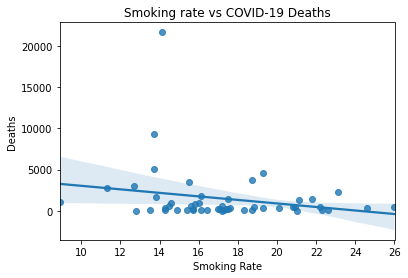

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(smoking_df['Smoking Rate'], smoking_df['Deaths'])
print("slope: " + str(slope))
print("p value: " + str(p_value))
smoking_plot = sns.regplot(x='Smoking Rate', y = 'Deaths', data = smoking_df)
smoking_plot.set_title("Smoking rate vs COVID-19 Deaths")
plt.show(smoking_plot)

Since the p-value of 0.115 is greater than 0.05, we failed to reject the Null Hypothesis and thus we can conclude that there is **NO** significant correlation between smoking rate and COVID-19 Deaths

# Test 2: Does Income Affect COVID-19 Death?

Since income is a great indicator of many things in the United States, we are curious to see if it is an indicator COVID-19 deaths. In this specific test, we removed New York from the data set because it was an outlier to get a more accurate representation of the data.  



Null Hypothesis: Income has no effect

Alternate Hypothesis: There is a significant correlation between income[link text](https://) and COVID-19 Deaths

a=0.05

In [0]:
income_df = df.drop(columns = ['Population','Pop Density','Gini','ICU Beds','GDP','Unemployment','Sex Ratio','Flu Deaths','Respiratory Deaths','Physicians','Hospitals',
                               'Health Spending','Pollution','Med-Large Airports','Temperature','Urban','Age 0-25','Age 26-54','Age 55+','School Closure Date','Smoking Rate'])

#Since New York is a great outlier in our data, we will exclude New York
income_df = income_df.drop("New York", axis=0)
income_df.head()

,Tested,Infected,Deaths,Income
State,,,,
Alaska,28680,381,10,59687
Alabama,129444,10164,403,42334
Arkansas,70323,4043,94,42566
Arizona,150241,11380,542,43650
California,991897,67939,2770,62586


slope: 0.10401338392425985
p value: 0.0003797685185062452


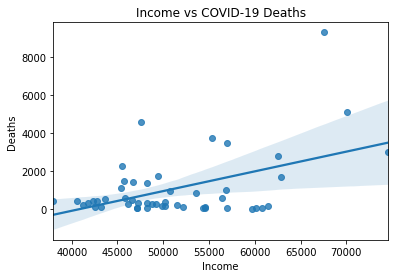

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(income_df['Income'], income_df['Deaths'])
print("slope: " + str(slope))
print("p value: " + str(p_value))
income_plot = sns.regplot(x='Income', y = 'Deaths', data = income_df)
income_plot.set_title("Income vs COVID-19 Deaths")
plt.show(income_plot)

Since the p-value of 0.00038 is less than 0.05, meaning we can reject the null hypothesis and say that there **IS** a significant positive correlation between Income and Deaths.  This is interesting because it is showing that a higher income is an indicator of more deaths.  Perhaps this is due to the fact that those with higher income live in more populated cities and thus are more exposed to each other.

# Test 3: Does Population Density Affect COVID-19 Death?

Since COVID-19 is easily spread through person-to-person contact, it's reasonable to assume that states with a higher population density would lead to more cases of COVID-19 and thus deaths caused by it. In this specific test, we removed D.C. from the data set because it was an outlier to get a more accurate representation of the data.

Null Hypothesis: Population density has no effect

Alternate Hypothesis: There is a significant correlation between population density and COVID-19 Deaths

a=0.05

In [0]:
pop_den_df = df.drop(columns = ['Income','Population','Gini','ICU Beds','GDP','Unemployment','Sex Ratio','Flu Deaths','Respiratory Deaths','Physicians','Hospitals',
                               'Health Spending','Pollution','Med-Large Airports','Temperature','Urban','Age 0-25','Age 26-54','Age 55+','School Closure Date','Smoking Rate'])

#Since the District of Columbia is a great outlier in our data, we will exclude the District of Columbia
pop_den_df = pop_den_df.drop("District of Columbia", axis=0)
pop_den_df

,Tested,Infected,Deaths,Pop Density
State,,,,
Alaska,28680,381,10,1.2863
Alabama,129444,10164,403,96.9221
Arkansas,70323,4043,94,58.4030
Arizona,150241,11380,542,64.9550
California,991897,67939,2770,256.3727
Colorado,106761,19879,987,56.4011
Connecticut,132508,33765,3008,735.8689
Delaware,31928,6565,225,504.3073
Florida,561057,40982,1735,410.1256


slope: 5.486002712103553
p value: 0.0015837574492009985


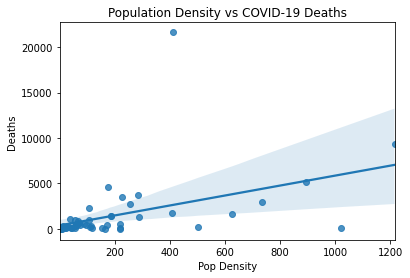

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pop_den_df['Pop Density'], pop_den_df['Deaths'])
print("slope: " + str(slope))
print("p value: " + str(p_value))
pop_den_plot = sns.regplot(x='Pop Density', y = 'Deaths', data = pop_den_df)
pop_den_plot.set_title("Population Density vs COVID-19 Deaths")
plt.show(pop_den_plot)

Based on the results of our linear regression, we have found that there is a meaningful relationship between population density and Coronavirus deaths. Our resulting p-value of 0.00158 is  way below our threshold of 0.05 thus we are able to reject our null hypothesis.  The p-value coupled with our plot leads us to conclude that population density **DOES** increase a person’s risk of dying from Coronavirus.  We theorize this to be because with a higher population density, more people come into contact with each other allowing the virus to spread more quickly.

# Test 4: Does Pollution Affect COVID-19 Death?

Just like with smoking, pollution is known to negatively affect people's respiratory health. The following test will be comparing levels of pollution with deaths caused by COVID-19. In this specific test, we removed both New York and New Jersey from the data set because they were outliers to get a more accurate representation of the data.

Null Hypothesis: Pollution has no effect

Alternate Hypothesis: There is a significant correlation between pollution levels and COVID-19 Deaths

a=0.05

In [0]:
poll_df = df.drop(columns = ['Income','Population','Gini','ICU Beds','GDP','Unemployment','Sex Ratio','Flu Deaths','Respiratory Deaths','Physicians','Hospitals',
                               'Health Spending','Pop Density','Med-Large Airports','Temperature','Urban','Age 0-25','Age 26-54','Age 55+','School Closure Date','Smoking Rate'])

#Since New Jersey and New York are great outliers in our data, we will exclude New Jersey and New York
poll_df = poll_df.drop(["New Jersey", "New York"], axis=0)
poll_df

,Tested,Infected,Deaths,Pollution
State,,,,
Alaska,28680,381,10,6.4
Alabama,129444,10164,403,8.1
Arkansas,70323,4043,94,7.1
Arizona,150241,11380,542,9.7
California,991897,67939,2770,12.8
Colorado,106761,19879,987,6.7
Connecticut,132508,33765,3008,7.2
District of Columbia,30261,6389,328,9.8
Delaware,31928,6565,225,8.3


slope: 276.4318756481515
p value: 0.02046859732762195


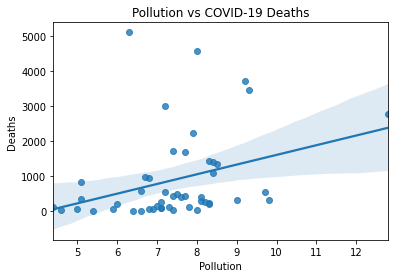

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(poll_df['Pollution'], poll_df['Deaths'])
print("slope: " + str(slope))
print("p value: " + str(p_value))
poll_plot = sns.regplot(x='Pollution', y = 'Deaths', data = poll_df)
poll_plot.set_title("Pollution vs COVID-19 Deaths")
plt.show(poll_plot)

Since our resulting p-value of 0.02 is below our threshold of 0.5, we reject the null hypothesis and prove that there **IS** a correlation between pollution and COVID-19 deaths. We suspect the elevated levels of pollution negatively affect people's health increasing their likelihood of dying from the Coronavirus.

# Standardize the pollution statistics 


In [0]:
import statistics 
poll_df.head()

mean = 0
for row,col in poll_df.iterrows():
  curr_pollution = int(poll_df.loc[row,'Pollution'])
  mean += curr_pollution

mean = mean/len(poll_df)

print(mean)
std_dev = statistics.mean(poll_df['Pollution'].values)

for row,col in poll_df.iterrows():
  curr_pollution = int(poll_df.loc[row,'Pollution'])
  poll_df.loc[row,'Standardized Pollution'] = float((curr_pollution - mean) / float(std_dev))


poll_df.head()


7.020408163265306


,Tested,Infected,Deaths,Pollution,Standardized Pollution
State,,,,,
Alaska,28680,381,10,6.4,-0.137589
Alabama,129444,10164,403,8.1,0.132086
Arkansas,70323,4043,94,7.1,-0.002752
Arizona,150241,11380,542,9.7,0.266924
California,991897,67939,2770,12.8,0.671436


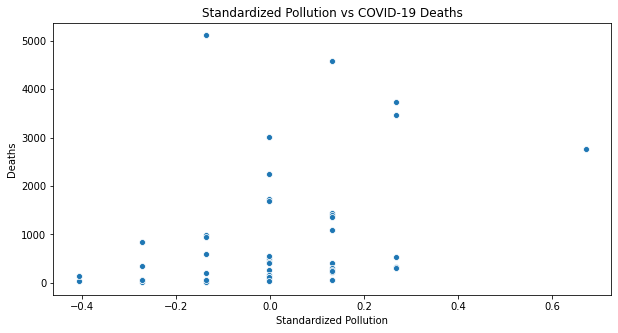

In [0]:
# slope, intercept, r_value, p_value, std_err = stats.linregress(poll_df['Standardized Pollution'], poll_df['Deaths'])

poll_plot = sns.scatterplot(x='Standardized Pollution', y = 'Deaths', data = poll_df)
poll_plot.set_title("Standardized Pollution vs COVID-19 Deaths")
plt.rcParams["figure.figsize"] = (10,5)
plt.show(poll_plot)

#Predicting the Future

Up until 2016, the EPA has reported massive trends in reduced air pollution in the United States, but with many environmental laws being repealed, the percentage of Americans living in areas with higher levels of pollution than the EPA recommends has increased.  In the past two years, the Washington Post reports that the concentration of fine-particle air pollution has risen by 5.5 percent due to repeals of environmental laws and climate change.  If the pandemic has not been dealt with and pollution continues to rise, using our model, we can predict how many more people will die per state.

In [0]:
# Average fine-prticle air pollution percentage rise in the past 2 years
a = 5.5/2

print("Average additional death count due to pollution per state per year")
y = slope * a
print(y)
print("Average additional death total due to pollution per year")
print(y*50)
print("Average deaths per state from COVID-19")
y0 = slope * (mean) + intercept
print(y0)
print("Average death total from COVID-19")
print(y0*50)
print()
print("Expected average deaths per state in 1 year from COVID-19")
y1 = slope * (mean + a) + intercept
print(y1)
print("Expected average death total in 1 year from COVID-19")
print(y1*50)
print()
print("Expected average deaths per state in 2 years from COVID-19")
y2 = slope * (mean + 2*a) + intercept
print(y2)
print("Expected average death total in 2 years from COVID-19")
print(y2*50)

Average additional death count due to pollution per state per year
760.1876580324166
Average additional death total due to pollution per year
38009.38290162083
Average deaths per state from COVID-19
787.3310533148135
Average death total from COVID-19
39366.55266574067

Expected average deaths per state in 1 year from COVID-19
1547.51871134723
Expected average death total in 1 year from COVID-19
77375.9355673615

Expected average deaths per state in 2 years from COVID-19
2307.7063693796463
Expected average death total in 2 years from COVID-19
115385.31846898231


Every year we would add another 760 deaths per state to our count which is another 38,000 Americans who will die from COVID-19.

# Conclusion
It is no exaggeration to state that Covid-19 is a pandemic that needs to be taken extremely seriously. With the ever present media influencing every part of our daily lives however, we must take care in what we share to prevent the spread of misinformation and mass panic. After performing regression analysis and null-hypothesis testing, we were able to determine whether or not smoking rate, income, population density, and pollution are correlated to the death rates due to Covid-19. The results are as follows

**CORRELATION**

Smoking Rate: No correlation

Income: Correlation

Population Density: Correlation

Pollution: Correlation

It is surprising to note that smoking rate is not a factor that contributes to a higher death rate, as Covid-19 is a virus that affects our respiratory system. One would imagine that since smoking damages our lungs, it would make smokers much weaker to the virus. Having performed the regression analysis and null-hypothesis testing, we can now confidently debunk this myth and ensure that people get the right information.